In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import requests
page = requests.get("https://www.timeanddate.com/weather/india/chennai/historic")
from bs4 import BeautifulSoup
soup=BeautifulSoup(page.content,"html.parser")

In [3]:
table=soup.find_all("table",{"class":"zebra tb-wt fw va-m tb-hover"})
l=[]
for i,items in enumerate(table):
    for i,row in enumerate(items.find_all("tr")):
        d = {}
        try:
#             print(i , row.find_all("td",{"class":""})[0].text)
            d['Temp'] = row.find_all("td",{"class":""})[0].text
        except:
            d['Temp'] = np.nan
            
        try:
#             print(i , row.find("td",{"class":"small"}).text)
            d['Weather'] = row.find("td",{"class":"small"}).text
        except:
            d['Weather']= np.nan
            
        try:   
#             print(i , row.find_all("td",{"class":"sep"})[0].text)
            d['Wind'] = row.find_all("td",{"class":"sep"})[0].text
        except:
            d['Wind'] = np.nan
            
        try:  
#             print(i, row.find("span",{"class":"comp sa16"})['title'])
            d['Direction'] = row.find("span")["title"]
        except:
            try:
                d['Direction'] = row.find("span",{"class":"comp sa16"})["title"]
            except:
                d['Direction'] = np.nan
            
        try:
#             print(i , row.find_all("td",{"class":""})[2].text)
            d['Humidity'] = row.find_all("td",{"class":""})[2].text
        except:
            d['Humidity'] = np.nan
        try:
#             print(i , row.find_all("td",{"class":"sep"})[1].text)
            d['Barometer'] =  row.find_all("td",{"class":"sep"})[1].text
        except:
            d['Barometer'] = np.nan
    
        try:
#             print(i , row.find_all("td",{"class":""})[3].text)
            d['Visibility'] =  row.find_all("td",{"class":""})[3].text
        except:
             d['Visibility'] = np.nan
                
        l.append(d)

In [4]:
import pandas
df = pandas.DataFrame(l)

In [5]:
df.to_csv('data.csv', columns = ['Temp', 'Weather', 'Wind', 'Direction', 'Humidity', 'Barometer',
       'Visibility'])

In [6]:
df

,Temp,Weather,Wind,Direction,Humidity,Barometer,Visibility
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33 °C,Scattered clouds.,19 km/h,NaN,63%,1002 mbar,6 km
3,33 °C,Scattered clouds.,15 km/h,Wind blowing from 240° West-southwest to East-...,63%,1002 mbar,7 km
4,33 °C,Scattered clouds.,19 km/h,Wind blowing from 260° West to East,63%,1002 mbar,8 km
5,33 °C,Scattered clouds.,22 km/h,Wind blowing from 270° West to East,63%,1002 mbar,8 km
6,34 °C,Scattered clouds.,26 km/h,Wind blowing from 260° West to East,59%,1002 mbar,8 km
7,34 °C,Scattered clouds.,26 km/h,Wind blowing from 270° West to East,59%,1002 mbar,8 km
8,34 °C,Scattered clouds.,26 km/h,Wind blowing from 250° West-southwest to East-...,59%,1003 mbar,8 km
9,34 °C,Scattered clouds.,26 km/h,Wind blowing from 240° West-southwest to East-...,59%,1003 mbar,6 km


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

Temp          1
Weather       1
Wind          1
Direction     3
Humidity      1
Barometer     1
Visibility    1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(32, 7)

In [11]:
df.dtypes

Temp          object
Weather       object
Wind          object
Direction     object
Humidity      object
Barometer     object
Visibility    object
dtype: object

In [12]:
df

,Temp,Weather,Wind,Direction,Humidity,Barometer,Visibility
3,33 °C,Scattered clouds.,15 km/h,Wind blowing from 240° West-southwest to East-...,63%,1002 mbar,7 km
4,33 °C,Scattered clouds.,19 km/h,Wind blowing from 260° West to East,63%,1002 mbar,8 km
5,33 °C,Scattered clouds.,22 km/h,Wind blowing from 270° West to East,63%,1002 mbar,8 km
6,34 °C,Scattered clouds.,26 km/h,Wind blowing from 260° West to East,59%,1002 mbar,8 km
7,34 °C,Scattered clouds.,26 km/h,Wind blowing from 270° West to East,59%,1002 mbar,8 km
8,34 °C,Scattered clouds.,26 km/h,Wind blowing from 250° West-southwest to East-...,59%,1003 mbar,8 km
9,34 °C,Scattered clouds.,26 km/h,Wind blowing from 240° West-southwest to East-...,59%,1003 mbar,6 km
10,33 °C,Broken clouds.,28 km/h,Wind blowing from 240° West-southwest to East-...,59%,1003 mbar,6 km
11,33 °C,Broken clouds.,28 km/h,Wind blowing from 240° West-southwest to East-...,63%,1004 mbar,6 km
12,33 °C,Broken clouds.,20 km/h,Wind blowing from 260° West to East,63%,1005 mbar,6 km


In [13]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),'\n',sep='\n')

Temp
['29\xa0°C' '30\xa0°C' '31\xa0°C' '32\xa0°C' '33\xa0°C' '34\xa0°C']


Weather
['Broken clouds.' 'Partly cloudy.' 'Passing clouds.' 'Scattered clouds.']


Wind
['11 km/h' '13 km/h' '15 km/h' '17 km/h' '19 km/h' '20 km/h' '22 km/h'
 '24 km/h' '26 km/h' '28 km/h']


Direction
['Wind blowing from 210° South-southwest to North-northeast'
 'Wind blowing from 230° Southwest to Northeast'
 'Wind blowing from 240° West-southwest to East-northeast'
 'Wind blowing from 250° West-southwest to East-northeast'
 'Wind blowing from 260° West to East'
 'Wind blowing from 270° West to East']


Humidity
['59%' '62%' '63%' '66%' '67%' '70%' '74%']


Barometer
['1000 mbar' '1001 mbar' '1002 mbar' '1003 mbar' '1004 mbar' '1005 mbar']


Visibility
['5\xa0km' '6\xa0km' '7\xa0km' '8\xa0km']




In [14]:
df['Wind'] = df['Wind'].str.replace('km/h', '').astype('int64')

In [15]:
df['Temp'] = df['Temp'].str.replace('\xa0', ' ').str.replace('°C', '')

In [16]:
df['Temp']=df['Temp'].astype('float64')

In [17]:
df['Humidity'] = df['Humidity'].str.extract('(\d+)', expand=False).astype(pd.Int64Dtype())
df['Barometer'] = df['Barometer'].str.extract('(\d+)', expand=False).astype(pd.Int64Dtype())
df['Visibility'] = df['Visibility'].str.extract('(\d+)', expand=False).astype(pd.Int64Dtype())

In [18]:
df.dtypes

Temp          float64
Weather        object
Wind            int64
Direction      object
Humidity        Int64
Barometer       Int64
Visibility      Int64
dtype: object

In [19]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtypes=="O":
        cat.append(i)
    else:
        num.append(i)

In [20]:
cat

['Weather', 'Direction']

In [21]:
num

['Temp', 'Wind', 'Humidity', 'Barometer', 'Visibility']

In [22]:
df.describe()

,Temp,Wind,Humidity,Barometer,Visibility
count,32.000000,32.00000,32.000000,32.000000,32.000000
mean,31.781250,19.68750,63.843750,1003.062500,5.718750
std,1.698849,4.41725,4.840084,1.389767,1.113969
min,29.000000,11.00000,59.000000,1000.000000,5.000000
25%,30.000000,17.00000,59.000000,1002.000000,5.000000
50%,32.500000,19.00000,63.000000,1003.000000,5.000000
75%,33.000000,22.00000,66.000000,1004.000000,6.000000
max,34.000000,28.00000,74.000000,1005.000000,8.000000


In [23]:
for i in cat:
    print(df[i].unique())

['Scattered clouds.' 'Broken clouds.' 'Partly cloudy.' 'Passing clouds.']
['Wind blowing from 240° West-southwest to East-northeast'
 'Wind blowing from 260° West to East'
 'Wind blowing from 270° West to East'
 'Wind blowing from 250° West-southwest to East-northeast'
 'Wind blowing from 230° Southwest to Northeast'
 'Wind blowing from 210° South-southwest to North-northeast']


<AxesSubplot:>

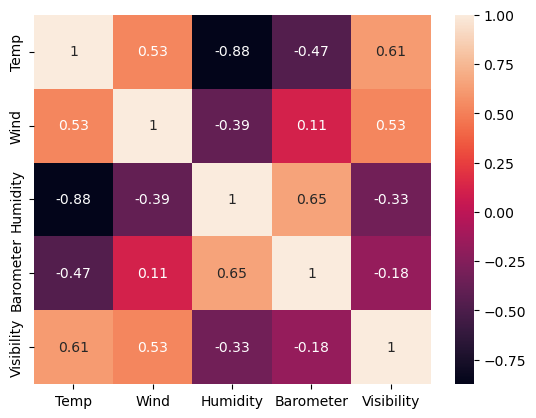

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
# Group by 'Weather' column and calculate average wind speed
average_wind_speed = df.groupby('Weather')['Wind'].mean()
print(average_wind_speed)


Weather
Broken clouds.       20.000000
Partly cloudy.       17.363636
Passing clouds.      19.000000
Scattered clouds.    22.857143
Name: Wind, dtype: float64


In [26]:
# Calculate the average temperature
average_temperature = df['Temp'].mean()
print(average_temperature)


31.78125


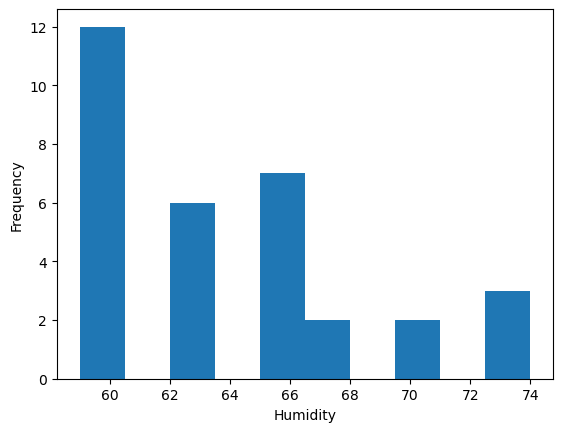

In [27]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Humidity' column
plt.hist(df['Humidity'], bins=10)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()


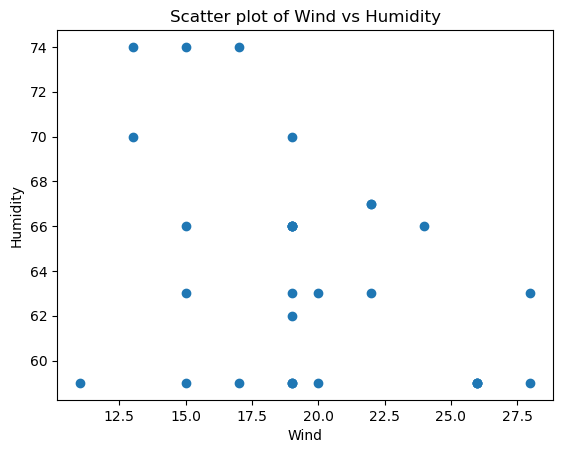

In [28]:
#Scatter plot: Visualize the relationship between two numeric variables.
import matplotlib.pyplot as plt

# Scatter plot of 'Wind' vs 'Humidity'
plt.scatter(df['Wind'], df['Humidity'])
plt.xlabel('Wind')
plt.ylabel('Humidity')
plt.title('Scatter plot of Wind vs Humidity')
plt.show()


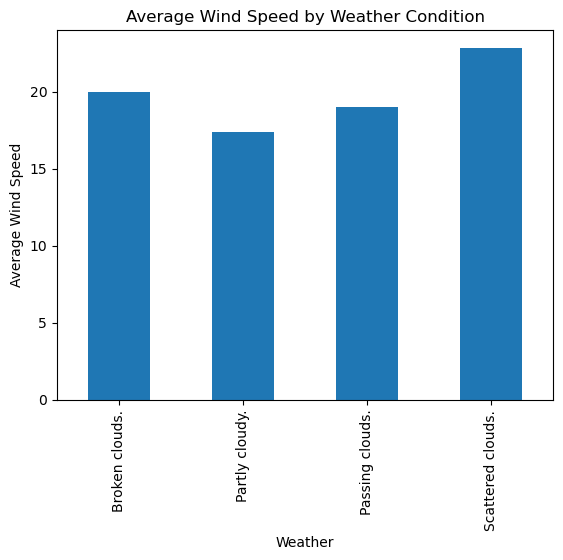

In [29]:
#Bar chart: Compare categorical variables or display aggregated values.
import matplotlib.pyplot as plt

# Bar chart of average wind speed by weather condition
average_wind_speed = df.groupby('Weather')['Wind'].mean()
average_wind_speed.plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('Average Wind Speed')
plt.title('Average Wind Speed by Weather Condition')
plt.show()


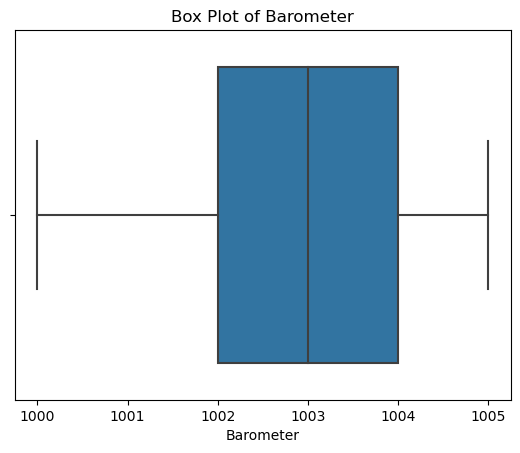

In [30]:
#Box plot: Visualize the distribution and identify outliers.
import seaborn as sns

# Box plot of 'Barometer' column
sns.boxplot(x=df['Barometer'])
plt.xlabel('Barometer')
plt.title('Box Plot of Barometer')
plt.show()


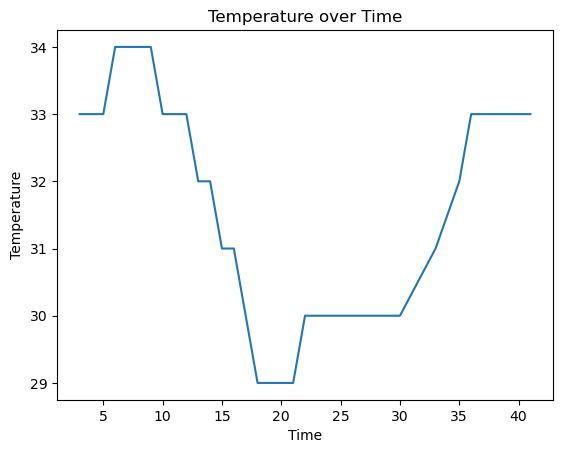

In [31]:
#Line plot: Track the changes of a variable over time.
import matplotlib.pyplot as plt

# Line plot of 'Temp' over time
plt.plot(df.index, df['Temp'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()


In [33]:
df.to_csv('output.csv', index=False)